In [1]:
# Зависимости
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import cluster
from sklearn import datasets

In [2]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

In [3]:
# Приведем полученный набор данных к формату pandas.DataFrame
x = pd.DataFrame(test_x)
print(x)

             0          1
0     6.920100  -6.153933
1    -1.234188  -4.488754
2     7.028759  -5.173508
3    -0.158759   5.279992
4    -1.816125  -2.647938
...        ...        ...
4995  6.560120  -3.930715
4996  1.539345   4.776682
4997  2.266097  10.649638
4998  1.217126   9.624183
4999  2.802161   4.392671

[5000 rows x 2 columns]


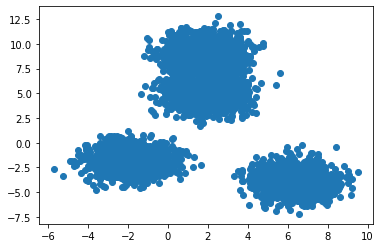

In [4]:
# Отобразим полученный набор данных в виде точек на плоскости
plt.scatter(x[0], x[1])
plt.show()

In [5]:
# Теперь запустим алгоритм k-средних, указав число кластеров, которое нам изначально известно
kmeans = sklearn.cluster.KMeans(n_clusters = 4)
y = kmeans.fit_predict(x)

# Выведем значение инерции (именно оно минимизируется при использовании алгоритма k-средних)
print(kmeans.inertia_)

10090.532660776395


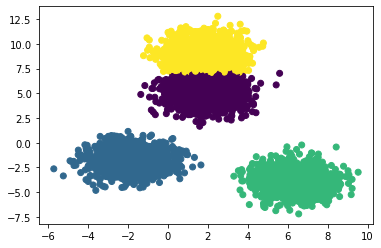

In [6]:
# Отобразим набор данных, используя разные цвета для разных кластеров
plt.scatter(x[0], x[1], c = y)
plt.show()    

In [7]:
# Загрузите файл "worldcities.csv" в DataFrame.
worldcities_dataset = pd.read_csv("worldcities.csv")
worldcities_dataset.head(10)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Malishevë,Malisheve,42.4822,20.7458,Kosovo,XK,XKS,Malishevë,admin,NaN,1901597212
1,Prizren,Prizren,42.2139,20.7397,Kosovo,XK,XKS,Prizren,admin,NaN,1901360309
2,Zubin Potok,Zubin Potok,42.9144,20.6897,Kosovo,XK,XKS,Zubin Potok,admin,NaN,1901608808
3,Kamenicë,Kamenice,42.5781,21.5803,Kosovo,XK,XKS,Kamenicë,admin,NaN,1901851592
4,Viti,Viti,42.3214,21.3583,Kosovo,XK,XKS,Viti,admin,NaN,1901328795
5,Shtërpcë,Shterpce,42.2394,21.0272,Kosovo,XK,XKS,Shtërpcë,admin,NaN,1901828239
6,Shtime,Shtime,42.4331,21.0397,Kosovo,XK,XKS,Shtime,admin,NaN,1901598505
7,Vushtrri,Vushtrri,42.8231,20.9675,Kosovo,XK,XKS,Vushtrri,admin,NaN,1901107642
8,Dragash,Dragash,42.0265,20.6533,Kosovo,XK,XKS,Dragash,admin,NaN,1901112530
9,Podujevë,Podujeve,42.9111,21.1899,Kosovo,XK,XKS,Podujevë,admin,NaN,1901550082


In [8]:
# Сформируйте новый DataFrame из столбцов 'lng' и 'lat' оригинального DataFrame.
dataset = worldcities_dataset.iloc[:, 2:4]
dataset.head(10)

,lat,lng
0,42.4822,20.7458
1,42.2139,20.7397
2,42.9144,20.6897
3,42.5781,21.5803
4,42.3214,21.3583
5,42.2394,21.0272
6,42.4331,21.0397
7,42.8231,20.9675
8,42.0265,20.6533
9,42.9111,21.1899


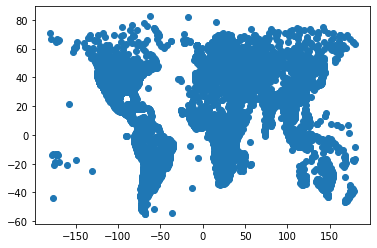

In [9]:
# Отобразите полученный DataFrame в виде точек, где координаты по оси X берутся из столбца 'lng', а координаты по оси Y - из столбца 'lat'.
plt.scatter(dataset['lng'], dataset['lat'])
plt.show()

In [10]:
# Создайте пустой список inertia для хранения результатов вычислительных экмпериментов.
inertia = []

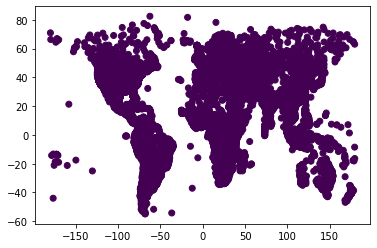

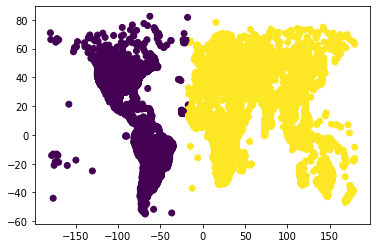

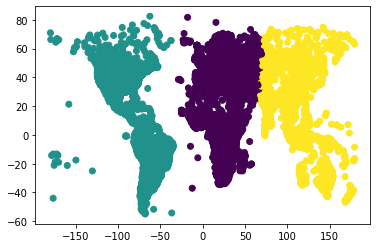

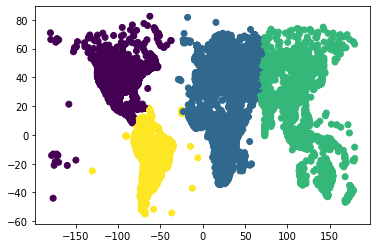

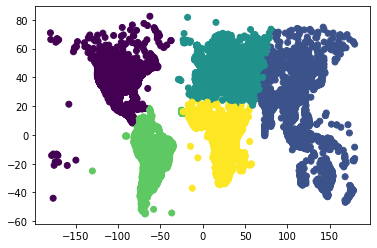

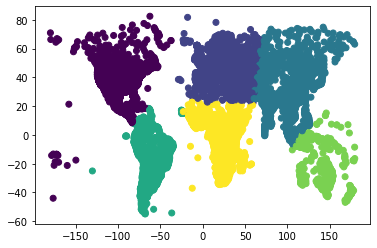

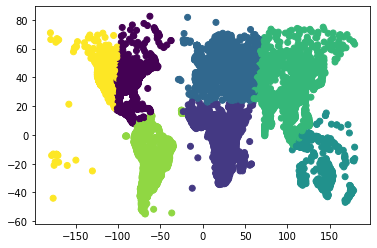

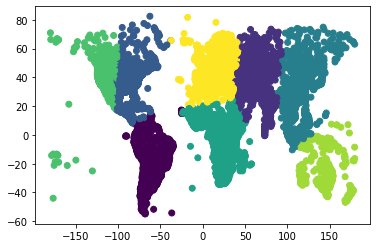

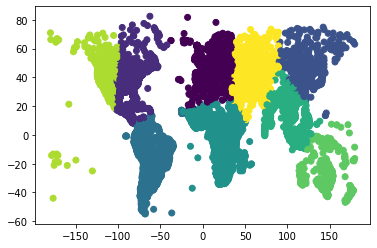

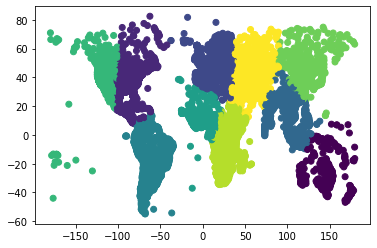

In [11]:
# Напишите цикл по количеству кластеров от 1 до 10.
# В цикле запускайте алгоритм k-средних с текущим количеством кластеров,
# добавляйте в список inertia значение для текущего результата работы алгоритма,
# отобразите набор данных, используя разные цвета для разных кластеров.
# Все шаги делайте по аналогии с примером выше.
for i in range(1,11):
    kmeans = sklearn.cluster.KMeans(n_clusters = i)
    y = kmeans.fit_predict(dataset)
    
    inertia.append(kmeans.inertia_)
    
    plt.scatter(dataset['lng'], dataset['lat'], c = y)
    plt.show() 

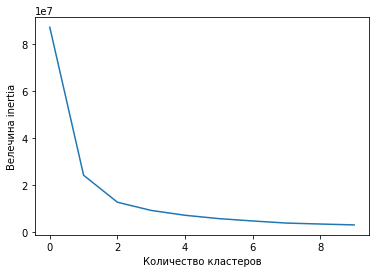

In [12]:
# Постройте график изменения величины inertia от количества кластеров.
plt.plot(inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('Велечина inertia')
plt.show()